In [1]:

# Wrangling
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Pré - Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score




In [2]:
df = pd.read_csv('streaming_data.csv')
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [4]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [5]:
df.isna().sum()


Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

***ETAPA 2***


In [6]:
df_sem_null = ["Time_on_platform", "Num_streaming_services","Churned", "Avg_rating", "Devices_connected"]
df[df_sem_null] = df[df_sem_null].fillna(0)
# Elimina linhas nulas nas colunas Gender, Subscription_type e Age
df = df.dropna(subset=["Gender", "Subscription_type", "Age"])


In [7]:
df.isna().sum()
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,0.0,0.0,Basic,0.0,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,0.0,Premium,0.0,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,0.0,5.0,Premium,0.0,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,0.0,4,0.00,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [8]:
# Alterando Valores da coluna Churned de 0 e 1 para Não e Sim.


df["Churned"] = df["Churned"].map({0: "No", 1: "Yes"})




df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


<ipython-input-8-b6aa88818e56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churned"] = df["Churned"].map({0: "No", 1: "Yes"})


In [9]:


colunasfloat = ["Age", "Time_on_platform", "Devices_connected", "Num_streaming_services", "Avg_rating"]
df[colunasfloat] = df[colunasfloat].astype(int)


<ipython-input-9-9ae3f6b62ade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colunasfloat] = df[colunasfloat].astype(int)


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.Gender)
df.Gender = le.transform(df.Gender)

le.fit(df.Subscription_type)
df.Subscription_type = le.transform(df.Subscription_type)
df.head()


<ipython-input-10-8c6909c92a1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender = le.transform(df.Gender)
<ipython-input-10-8c6909c92a1e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Subscription_type = le.transform(df.Subscription_type)


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,1,4700,3,0,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,0,6107,2,2,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,1,6374,3,1,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,1,0,5,0,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,1,3024,2,0,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [11]:
x = df.drop(labels=["Churned", "User_id"], axis=1)

y = df["Churned"]


In [12]:
# Pre-processamento de x
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# Criando e ajustando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Pre-processamento de x
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)

In [15]:
# Lista de modelos a serem testados
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Dicionário para armazenar os resultados
results = {}

# Treinamento e avaliação para cada modelo
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_test_binary = np.where(y_test == 'Yes', 1, 0)
    y_pred_binary = np.where(y_pred == 'Yes', 1, 0)

    roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)

    results[name] = {
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Imprimir os resultados
for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


--- Logistic Regression ---
ROC AUC: 0.5126564742151789
Accuracy: 0.5121350984385608
Precision: 0.5067825026672763
Recall: 0.5695443645083933

--- Decision Tree ---
ROC AUC: 0.8159345379397793
Accuracy: 0.8158520027155465
Precision: 0.8075117370892019
Recall: 0.8249400479616307

--- Random Forest ---
ROC AUC: 0.87921993384102
Accuracy: 0.8794976238968092
Precision: 0.9020749908991628
Recall: 0.8489208633093526

--- Gradient Boosting ---
ROC AUC: 0.769203060501001
Accuracy: 0.7710454854039376
Precision: 0.9493417286777333
Recall: 0.5681740322028092



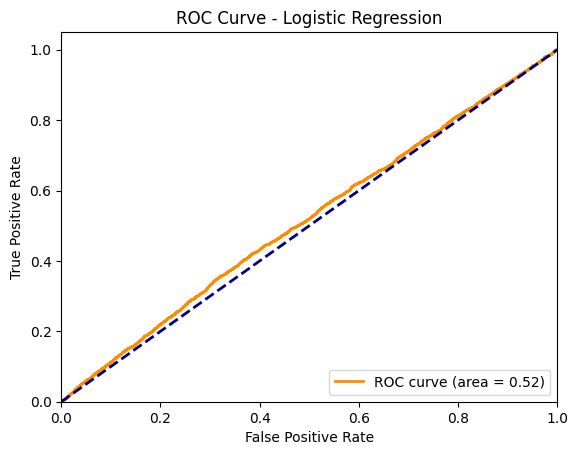

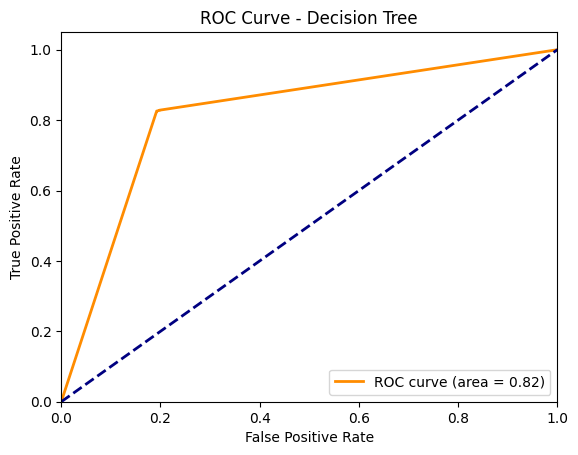

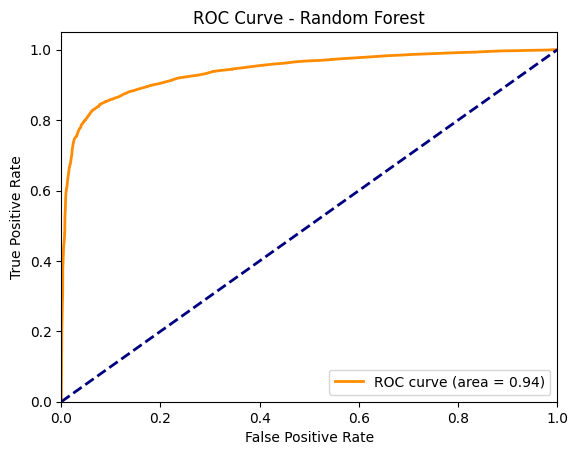

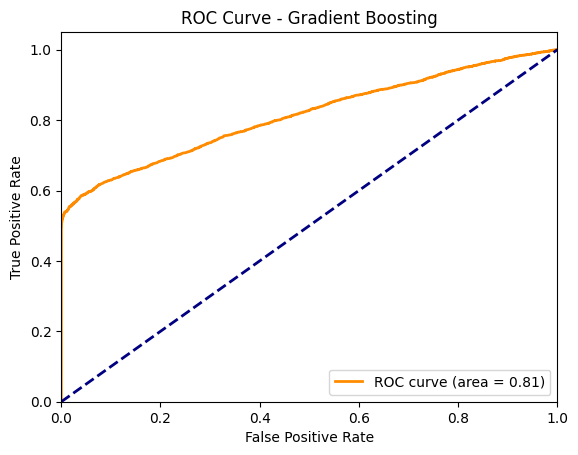

In [16]:
# Traçando as curvas ROC para cada modelo
from sklearn.metrics import roc_curve, auc
for name, model in models:
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades do rótulo positivo
    fpr, tpr, _ = roc_curve(y_test_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plotando
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

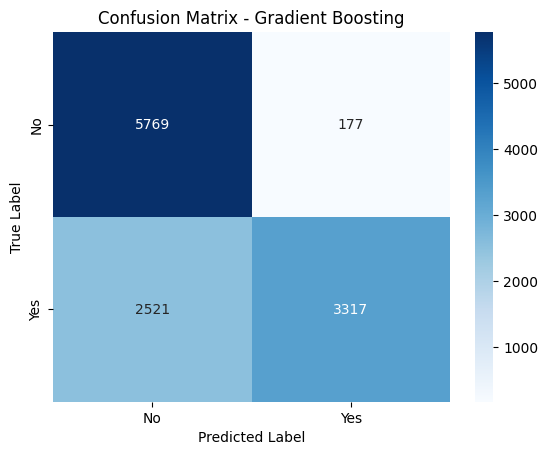

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ...

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plotar matriz de confusão como um heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV

In [24]:
#Parametros
parametros= {'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5 ,10]}

In [ ]:
#Grid_Search
GridSearch = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
GridSearch.fit(X_train, y_train)
melhores_parametros = GridSearch.best_params_
melhor_resultado = GridSearch.cv_results_
print(melhores_parametros)
print(melhor_resultado)

In [ ]:

# Defina os parâmetros para cada modelo
parametros_decision_tree = {'max_depth': [None, 10, 20, 30]}
parametros_random_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
parametros_gradient_boosting = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
parametros_logistic_regression = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Lista de modelos e parâmetros
modelos_e_parametros = [
    (DecisionTreeClassifier(), parametros_decision_tree),
    (RandomForestClassifier(), parametros_random_forest),
    (GradientBoostingClassifier(), parametros_gradient_boosting),
    (LogisticRegression(), parametros_logistic_regression)
]

# Dicionário para armazenar os melhores resultados
melhores_resultados = {}

# Aplicar Grid Search para cada modelo
for modelo, parametros in modelos_e_parametros:
    grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    melhores_parametros = grid_search.best_params_
    melhor_resultado = grid_search.cv_results_

    melhores_resultados[type(modelo).__name__] = {
        'Melhores Parâmetros': melhores_parametros,
        'Melhor Resultado': melhor_resultado
    }

    print(f"--- {type(modelo).__name__} ---")
    print("Melhores Parâmetros:")
    print(melhores_parametros)
    print("Melhor Resultado:")
    print(melhor_resultado)
    print()

# Imprimir os resultados finais
print("Resultados Finais:")
print(melhores_resultados)


#  DecisionTreeClassifier
Melhores Parâmetros: {'max_depth': None}
Melhor Resultado:
Tempo de Treinamento: Média entre 0.1658s e 0.3715s
Tempo de Predição: Média entre 0.0212s e 0.0457s
Acurácia Média: Entre 0.8001 e 0.7976
# RandomForestClassifier
Melhores Parâmetros: {'max_depth': 30, 'n_estimators': 200}
Melhor Resultado:
Tempo de Treinamento: Média entre 1.7500s e 11.5386s
Tempo de Predição: Média entre 0.0826s e 0.5905s
Acurácia Média: Entre 0.8684 e 0.8652
# GradientBoostingClassifier
Melhores Parâmetros: {'learning_rate': 0.2, 'n_estimators': 200}
Melhor Resultado:
Tempo de Treinamento: Média entre 2.5037s e 10.2438s
Tempo de Predição: Média entre 0.0329s e 0.0619s
Acurácia Média: Entre 0.8381 e 0.7368
# LogisticRegression
Melhores Parâmetros: {'C': 0.01}
Melhor Resultado:
Tempo de Treinamento: Média entre 0.1416s e 0.1521s
Tempo de Predição: Média entre 0.0397s e 0.0415s
Acurácia Média: Entre 0.5041 e 0.5036
# Resultados Finais
O RandomForestClassifier obteve a maior acurácia média, seguido pelo GradientBoostingClassifier.
O DecisionTreeClassifier também apresentou bom desempenho.
A LogisticRegression teve a menor acurácia média.